In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [2]:
df = pd.read_excel('Dataset_CreditScoring.xlsx')

# Handling Missing Value

## Impute median
Kta bisa mengisi missing value > 2.5 dengan nilai mediannya.

In [3]:
cols = ['InqTimeLast', 'TL50UtilCnt', 'TL75UtilCnt']

for col in cols:
    df[col] = df[col].fillna(df[col].median())

## Drop missing value yg persentasenya < 2.5 %

In [4]:
print('Jumlah Baris sebelum drop missing value:', df.shape[0])
df = df.dropna()
df.isna().sum()

Jumlah Baris sebelum drop missing value: 3000


TARGET             0
ID                 0
DerogCnt           0
CollectCnt         0
BanruptcyInd       0
InqCnt06           0
InqTimeLast        0
InqFinanceCnt24    0
TLTimeFirst        0
TLTimeLast         0
TLCnt03            0
TLCnt12            0
TLCnt24            0
TLCnt              0
TLSum              0
TLMaxSum           0
TLSatCnt           0
TLDel60Cnt         0
TLBadCnt24         0
TL75UtilCnt        0
TL50UtilCnt        0
TLBalHCPct         0
TLSatPct           0
TLDel3060Cnt24     0
TLDel90Cnt24       0
TLDel60CntAll      0
TLOpenPct          0
TLBadDerogCnt      0
TLDel60Cnt24       0
TLOpen24Pct        0
dtype: int64

In [5]:
print('Jumlah Baris setelah drop missing value:', df.shape[0])

Jumlah Baris setelah drop missing value: 2955


# Feature Transformation

Before Transformation


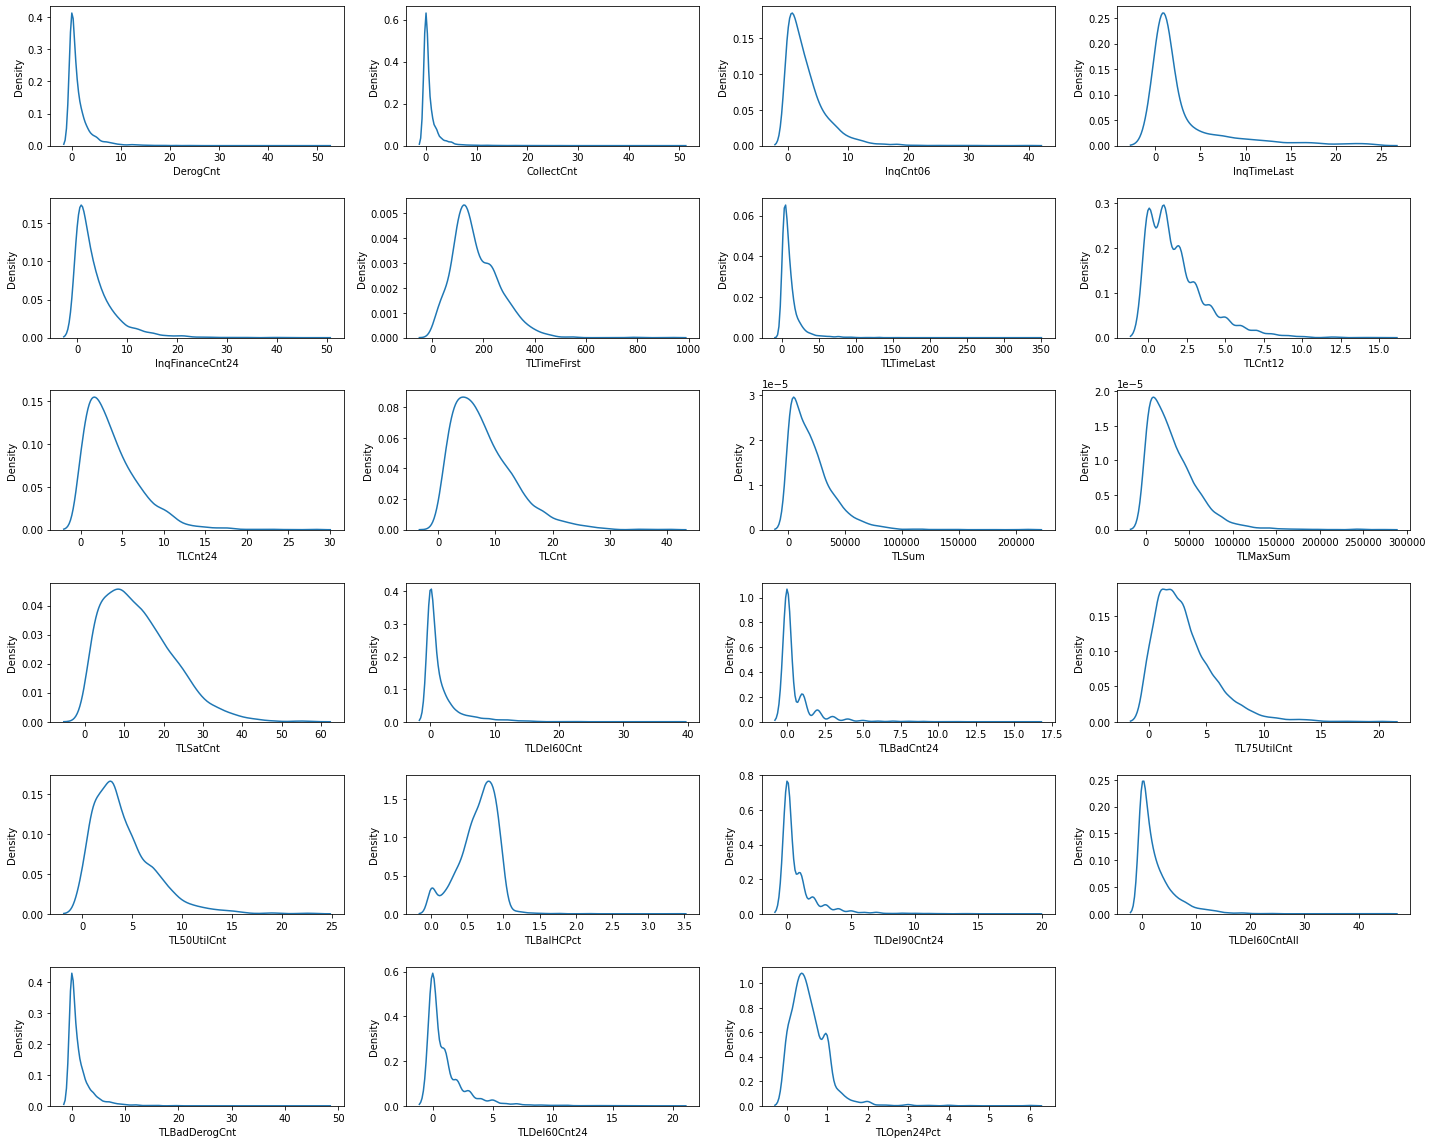

In [6]:
# sebelum transformasi
cols = ['DerogCnt', 'CollectCnt', 'InqCnt06', 'InqTimeLast', 'InqFinanceCnt24',
        'TLTimeFirst', 'TLTimeLast', 'TLCnt12', 'TLCnt24', 'TLCnt', 'TLSum', 'TLMaxSum',
        'TLSatCnt', 'TLDel60Cnt', 'TLBadCnt24', 'TL75UtilCnt', 'TL50UtilCnt', 'TLBalHCPct',
        'TLDel90Cnt24', 'TLDel60CntAll', 'TLBadDerogCnt', 'TLDel60Cnt24', 'TLOpen24Pct']

plt.figure(figsize=(20, 16))
print('Before Transformation')
for i in range(len(cols)):
    plt.subplot(6, 4, i+1)
    sns.kdeplot(data=df, x=df[cols[i]])
    plt.tight_layout()

In [7]:
from sklearn.preprocessing import PowerTransformer

for col in cols:
    df[col] = PowerTransformer().fit_transform(df[col].values.reshape(len(df), 1))
    print('Skew value ' + str(col) + ': ', round(df[col].skew(), 2))

Skew value DerogCnt:  0.37
Skew value CollectCnt:  0.79
Skew value InqCnt06:  0.01
Skew value InqTimeLast:  0.11
Skew value InqFinanceCnt24:  0.03
Skew value TLTimeFirst:  0.01
Skew value TLTimeLast:  0.03
Skew value TLCnt12:  0.03
Skew value TLCnt24:  -0.02
Skew value TLCnt:  -0.02
Skew value TLSum:  -0.19
Skew value TLMaxSum:  -0.13
Skew value TLSatCnt:  -0.05
Skew value TLDel60Cnt:  0.44
Skew value TLBadCnt24:  1.0
Skew value TL75UtilCnt:  -0.01
Skew value TL50UtilCnt:  -0.01
Skew value TLBalHCPct:  0.27
Skew value TLDel90Cnt24:  0.63
Skew value TLDel60CntAll:  0.11
Skew value TLBadDerogCnt:  0.32
Skew value TLDel60Cnt24:  0.38
Skew value TLOpen24Pct:  0.01


After Transformation


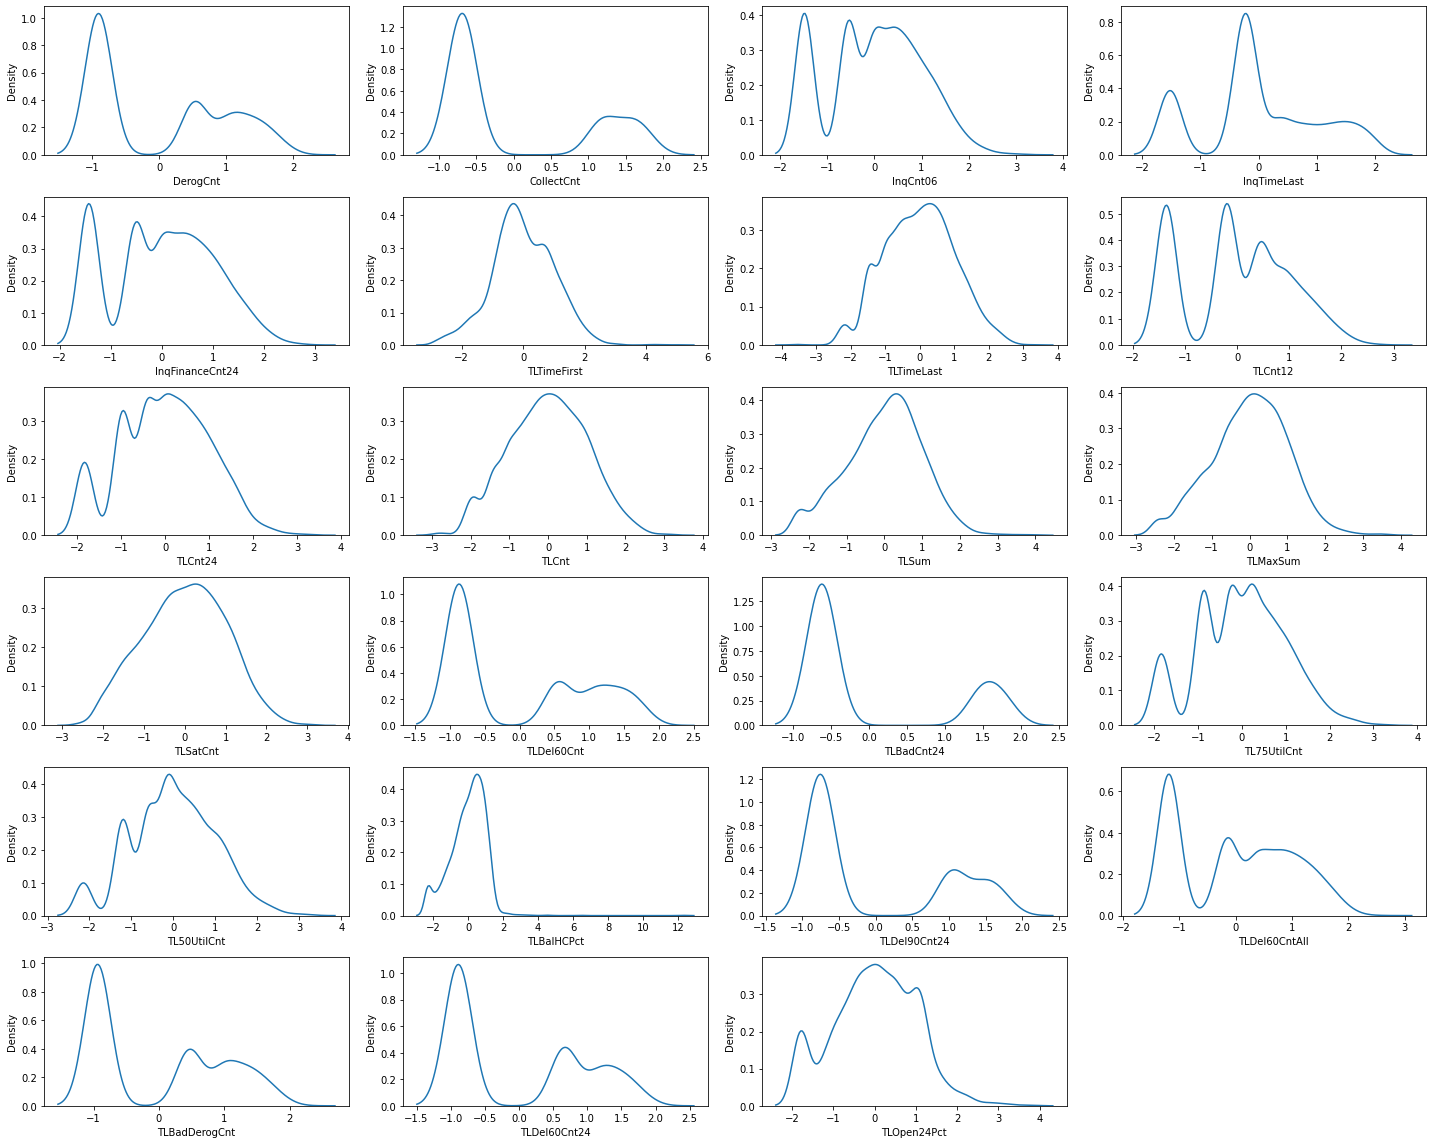

In [8]:
# setelah transformasi
plt.figure(figsize=(20, 16))
print('After Transformation')
for i in range(len(cols)):
    plt.subplot(6, 4, i+1)
    sns.kdeplot(data=df, x=df[cols[i]])
    plt.tight_layout()

# Handling Outliers

In [9]:
from scipy import stats

In [10]:
rows_before_filt = len(df)
print('Jumlah Baris sebelum filter:', rows_before_filt, '\n')

filtered_entries = np.array([True] * len(df))

for col in cols:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

# Total baris yang dibuang
rows_after_filt = len(df)
diff = round((rows_before_filt - rows_after_filt) / rows_before_filt * 100, 2)
print(f'Jumlah baris setelah memfilter outlier: {len(df)}')
print(f'Persentase outlier yang dibuang:', diff)

Jumlah Baris sebelum filter: 2955 

Jumlah baris setelah memfilter outlier: 2915
Persentase outlier yang dibuang: 1.35


Boxplot after drop missing values


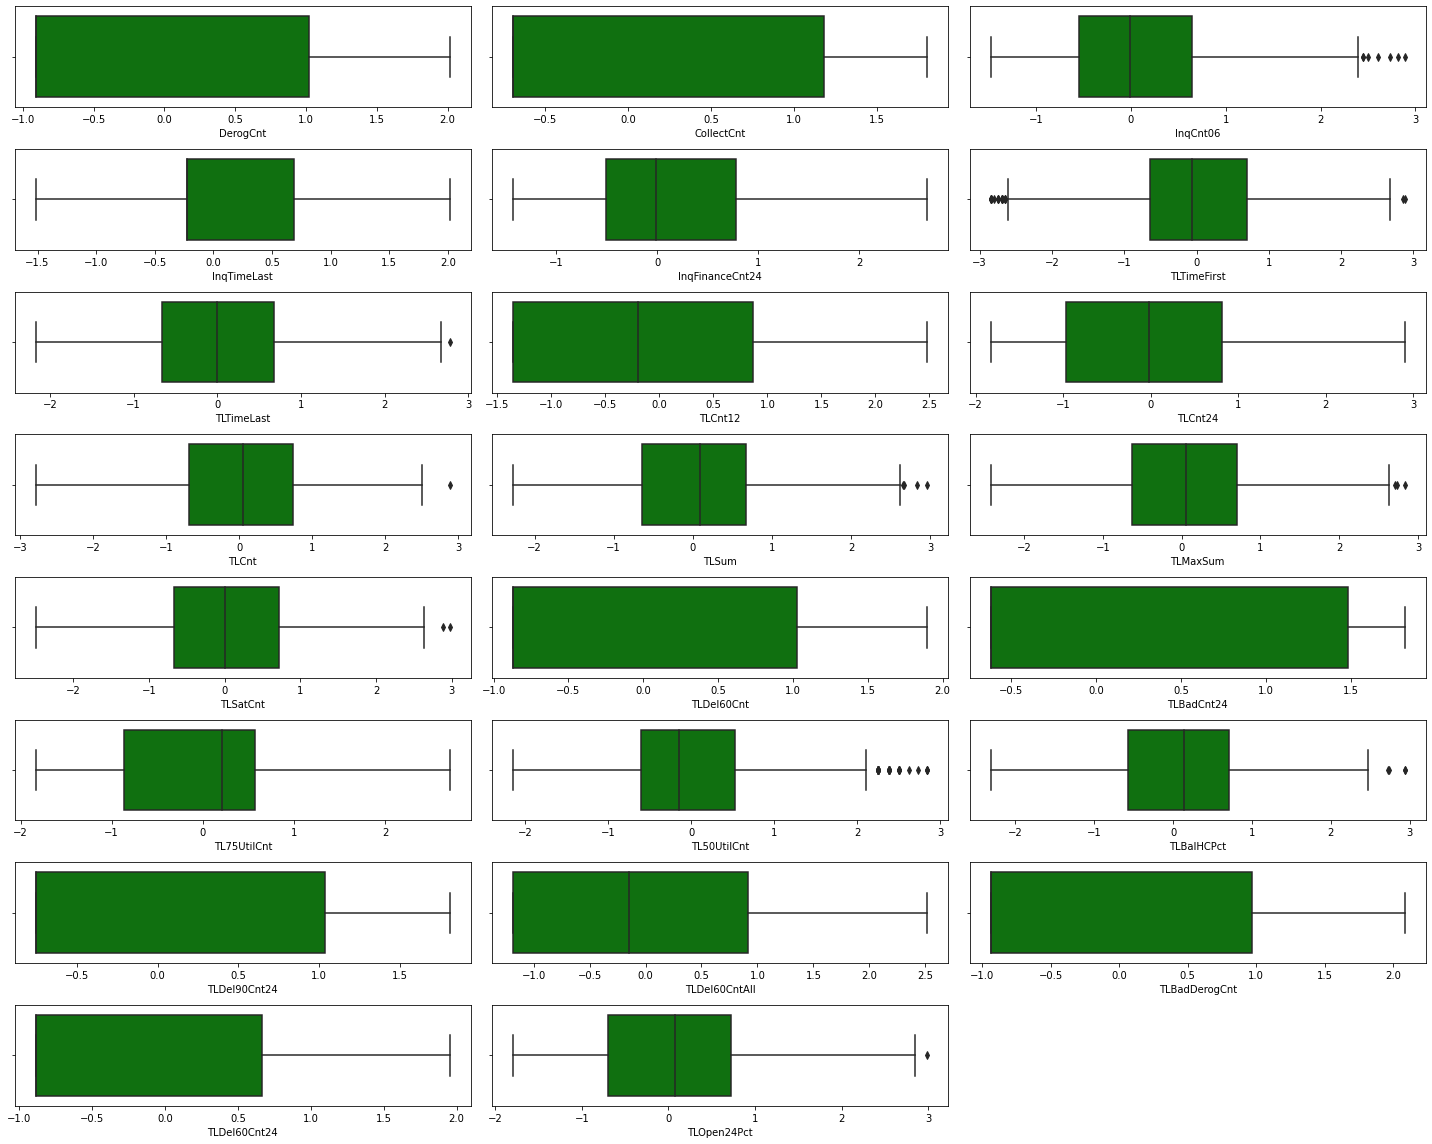

In [11]:
plt.figure(figsize=(20, 16))
print('Boxplot after drop missing values')
for i in range(len(cols)):
    plt.subplot(8, 3, i+1)
    sns.boxplot(x=df[cols[i]], color='green')
    plt.subplots_adjust(hspace=0.5)
    plt.tight_layout()

- Berdasarkan boxplot di atas terlihat bahwa outlier hanya teridentifikasi pada beberapa feature saja. Saya memilih untuk melakukan transformasi terlebih dulu sebelum melakukan handling outlier agar tidak banyak data yang di-drop karena diidentifikasi sebagai outlier. Ini keputusan yang bijak karena kita membuat semua feature untuk terdistribusi normal terlebih dulu.
- Alasan saya tidak menggunakan IQR adalah sifat IQR yang cukup ekstrim dalam membuang outlier sehingga dengan keterbatasan data yang ada dikuatirkan akan banyak membuang data. Oleh karena itu, saya memilih untuk menggunakan z-score.

# Feature selection (based on heatmap)

In [12]:
features =  ['CollectCnt', 'InqCnt06', 'InqFinanceCnt24', 'TLTimeFirst',
             'TLSatCnt', 'TLDel60Cnt', 'TL75UtilCnt', 'TLBalHCPct', 'TLSatPct', 'TLDel3060Cnt24',
             'TLDel60CntAll', 'TLOpenPct', 'TLBadDerogCnt', 'TLDel60Cnt24', 'TARGET']

# # After feature importance
# features = ['InqCnt06', 'InqFinanceCnt24', 'TLTimeFirst', 'TLSatCnt', 'TL75UtilCnt',
#  'TLBalHCPct', 'TLSatPct','TLDel60CntAll', 'TLOpenPct', 'TLDel60Cnt24', 'TARGET']

df = df[features]

# Handling Imbalance
- [SMOTE](https://towardsdatascience.com/smote-fdce2f605729)

In [13]:
X = df.drop(columns='TARGET')
y = df['TARGET']

In [14]:
X_copy =  X.copy()
y_copy = y.copy()

In [15]:
from imblearn import over_sampling
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(random_state=100).fit_resample(X, y)

In [16]:
print('Original')
print(pd.Series(y).value_counts())
print('\n')
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Original
0.0    2438
1.0     477
Name: TARGET, dtype: int64


SMOTE
1.0    2438
0.0    2438
Name: TARGET, dtype: int64


# Train-Test Split Data

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_over_SMOTE, y_over_SMOTE, test_size=0.3, random_state=100)

X_features = X_train

In [18]:
print('Total training data:', X_train.shape[0])
print('Total testing data :', X_test.shape[0])

Total training data: 3413
Total testing data : 1463


# Standarization

In [19]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# Modeling

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

- Karena kita fokus pada Target = 1 (Defaulters), maka kita bisa menggunakan metrics precision. Metrics precision digunakan ketika kita lebih memperhatikan jumlah False Positive (FP) yang sebaiknya lebih sedikit. Artinya, kita tidak ingin seseorang yang sebenarnya Good Loans tapi diprediksi sebagai Defaulters, di mana tentunya ini akan merugikan kita karena seharusnya itu menjadi sumber keuntungan kita.
- Selain itu, karena kita juga tidak menginginkan False Negative yang tinggi, di mana artinya seseorang yang Defaulters justru diprediksi sebagai Good Loans, tentunya ini akan berbahaya di kemudian hari yang dapat memberikan kerugian. Oleh karena itu kita juga bisa menggunakan recall.
- Kita bisa menggunakan F1-Score yang mencakup precision dan recall, dimana kita tahu bahwa False Positive dan False Negative sangat berbahaya dan kita tahu juga bahwa data kita imbalance [referensi](https://www.teknologi-bigdata.com/2020/05/validitas-rapid-test-covid-19-akurasi-accuracy-vs-f1-score.html#:~:text=F1%2Dscore%20digunakan%20ketika%20False,True%20Positive%20dan%20True%20Negative)
- F1-score digunakan untuk data imbalance dan fokus pada label positif.

In [21]:
# Fungsi Evaluasi Model
def eval(model):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    from sklearn.metrics import precision_score, recall_score, roc_auc_score, accuracy_score, f1_score
    print('f1_score (train):', round(f1_score(y_train, y_pred_train),2))
    print('precision (train):', round(precision_score(y_train, y_pred_train), 2))
    print('recall (train):', round(recall_score(y_train, y_pred_train), 2))
    print('roc-auc (train):', round(roc_auc_score(y_train, y_pred_train), 2))
    print("="*25)
    print('f1_score (test):', round(f1_score(y_test, y_pred_test),2))
    print('precision (test):', round(precision_score(y_test, y_pred_test), 2))
    print('recall (test):', round(recall_score(y_test, y_pred_test), 2))
    print('roc-auc (test):', round(roc_auc_score(y_test, y_pred_test), 2))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X_features.columns)
    ax = feat_importances.nlargest(30).plot(kind='barh', figsize=(10, 8), color='#008B8B', edgecolor='black')
    ax.set_facecolor("#F5F5F5")
    
    ax.invert_yaxis()
    
    ax.xaxis.label.set_size(12)
    ax.yaxis.label.set_size(12)

    plt.xlabel('Score')
    plt.ylabel('Feature')
    plt.title('Feature Importance Score', fontsize=15, fontweight='bold')

## Default Hyperparameter

In [22]:
etr = ExtraTreesClassifier(random_state = 100)
dt = DecisionTreeClassifier(random_state = 100)
knn = KNeighborsClassifier()
svc = SVC()
rf = RandomForestClassifier(random_state = 100)
gbc = GradientBoostingClassifier()
xgb = XGBClassifier(random_state = 100, use_label_encoder=False)
ada = AdaBoostClassifier(random_state = 100)
cat = CatBoostClassifier(random_state = 100, verbose = False)
lr = LogisticRegression(random_state=100)

models = [dt, knn, svc, rf, gbc, xgb, ada, cat, etr, lr]

names = ['Decision Tree',
         'KNN',
         'SVM',
         'Random Forest',
         'Gradient Boosting',
         'XGBoost',
         'AdaBoost',
         'CatBoost',
         'Extra Tree Classifier',
         'Logistic Regression']

In [23]:
for i, name in zip(models, names):
    print(name)
    model = i
    model.fit(X_train, y_train)
    eval(model)
    print('\n')

Decision Tree
f1_score (train): 1.0
precision (train): 1.0
recall (train): 1.0
roc-auc (train): 1.0
f1_score (test): 0.82
precision (test): 0.79
recall (test): 0.85
roc-auc (test): 0.82


KNN
f1_score (train): 0.88
precision (train): 0.8
recall (train): 0.99
roc-auc (train): 0.86
f1_score (test): 0.84
precision (test): 0.74
recall (test): 0.97
roc-auc (test): 0.83


SVM
f1_score (train): 0.85
precision (train): 0.82
recall (train): 0.87
roc-auc (train): 0.84
f1_score (test): 0.81
precision (test): 0.76
recall (test): 0.87
roc-auc (test): 0.81


Random Forest
f1_score (train): 1.0
precision (train): 1.0
recall (train): 1.0
roc-auc (train): 1.0
f1_score (test): 0.9
precision (test): 0.88
recall (test): 0.92
roc-auc (test): 0.9


Gradient Boosting
f1_score (train): 0.91
precision (train): 0.93
recall (train): 0.89
roc-auc (train): 0.91
f1_score (test): 0.87
precision (test): 0.87
recall (test): 0.88
roc-auc (test): 0.88


XGBoost
f1_score (train): 1.0
precision (train): 1.0
recall (train)

Beberapa model terbaik secara berurutan: Extra Tree Classifier, Random Forest, CatBoost, XGBoost, dan Gradient Boosting.

# Hyperparamater Tuning

## Ex Tree Classifier

In [24]:
hyperparameters = {'n_estimators': [5, 10, 15, 20,50,100],
          'max_depth': [None, 2,5,7, 10, 13, 15, 25],
          'min_samples_split': [0.5, 1, 3, 5, 7, 10],
          'min_samples_leaf': [1, 0.5, 3, 5, 7, 10],
          'max_features': [None, 'sqrt', 'auto', 'log2'],
          'bootstrap':[True, False]
         }


etr = ExtraTreesClassifier(random_state=100)
etr_tuned = RandomizedSearchCV(etr, hyperparameters, random_state=100, cv=5, scoring='precision')
etr_tuned.fit(X_train, y_train)
eval(etr_tuned)

f1_score (train): 1.0
precision (train): 1.0
recall (train): 0.99
roc-auc (train): 1.0
f1_score (test): 0.9
precision (test): 0.87
recall (test): 0.94
roc-auc (test): 0.9


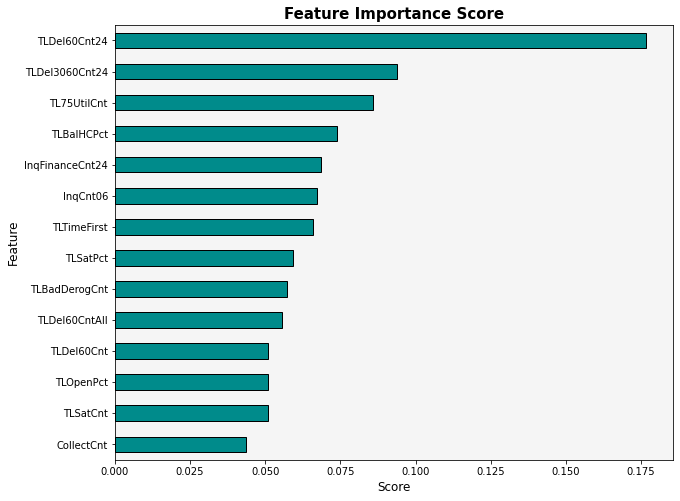

In [25]:
show_feature_importance(etr_tuned.best_estimator_)

## Random Forest

In [26]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah subtree 
                       bootstrap = [True], # Apakah pakai bootstrapping atau tidak
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],  # Maximum kedalaman tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       max_features = ['auto', 'sqrt', 'log2'], # Jumlah feature yg dipertimbangkan pada masing-masing split
                       n_jobs = [-1], # Core untuk parallel computation. -1 untuk menggunakan semua core
                      )

# Init
rf = RandomForestClassifier(random_state=100)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=100, scoring='precision')
rf_tuned.fit(X_train,y_train)

# Predict & Evaluation
eval(rf_tuned)

f1_score (train): 1.0
precision (train): 1.0
recall (train): 1.0
roc-auc (train): 1.0
f1_score (test): 0.9
precision (test): 0.88
recall (test): 0.92
roc-auc (test): 0.9


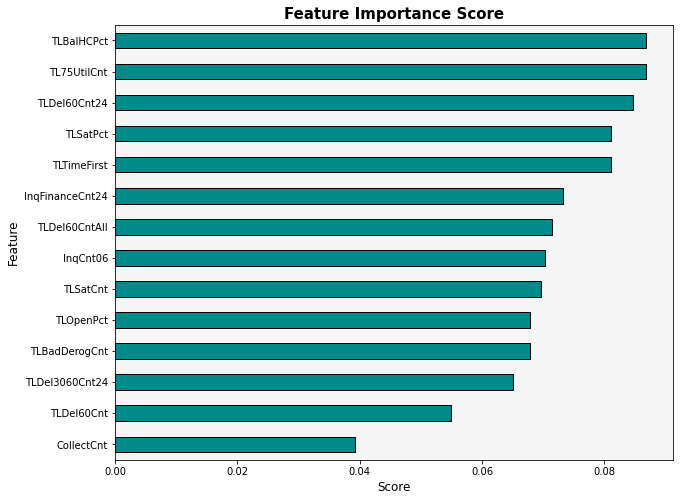

In [27]:
show_feature_importance(rf_tuned.best_estimator_)

## GradientBoosting

In [28]:
#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
    "n_estimators":[5,10, 20, 30, 45, 50,250,500],
    "max_depth":[1, 2, 3, 4, 5, 7, 9, 10, 15, 20, 25],
    "learning_rate":[0.01,0.1, 0.5, 1, 5, 10,100]
                    }

# Init
gbc = GradientBoostingClassifier()
gbc_tuned = RandomizedSearchCV(gbc, hyperparameters, cv=5, random_state=100, scoring='precision')
gbc_tuned.fit(X_train,y_train)

eval(gbc_tuned)

f1_score (train): 1.0
precision (train): 1.0
recall (train): 1.0
roc-auc (train): 1.0
f1_score (test): 0.89
precision (test): 0.89
recall (test): 0.9
roc-auc (test): 0.89


## Catboost

In [29]:
#Menjadikan ke dalam bentuk dictionary
hyperparameters = {'depth'         : [4,5,6,7,8,9, 10],
                 'learning_rate' : [0.01,0.02,0.03,0.04],
                  'iterations'    : [10, 20,30,40,50,60,70,80,90, 100]
                    }

# Init
cat = CatBoostClassifier(random_state = 100, verbose = False)
cat_tuned = RandomizedSearchCV(cat, hyperparameters, cv=5, random_state=100, scoring='precision', n_jobs=-1)
cat_tuned.fit(X_train,y_train)

eval(cat_tuned)

f1_score (train): 0.86
precision (train): 0.86
recall (train): 0.86
roc-auc (train): 0.86
f1_score (test): 0.84
precision (test): 0.8
recall (test): 0.87
roc-auc (test): 0.84


## XGBoost

In [30]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xg = XGBClassifier(random_state=100)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=100, scoring='precision')
xg_tuned.fit(X_train,y_train)

eval(xg_tuned)

f1_score (train): 0.91
precision (train): 0.97
recall (train): 0.85
roc-auc (train): 0.91
f1_score (test): 0.87
precision (test): 0.94
recall (test): 0.81
roc-auc (test): 0.88


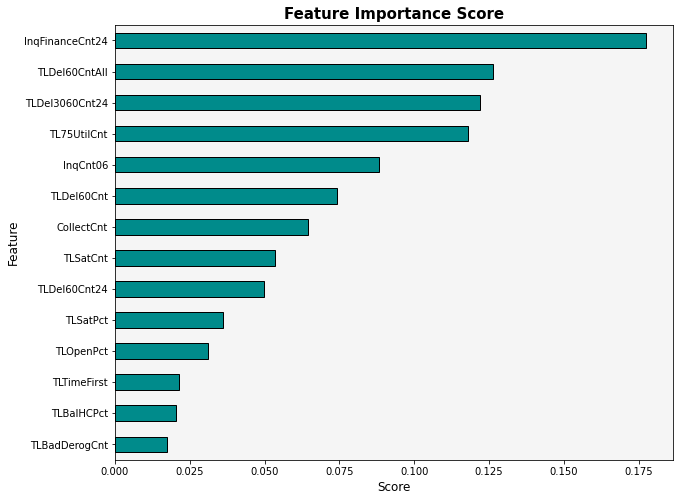

In [31]:
show_feature_importance(xg_tuned.best_estimator_)